In [4]:
import pickle
with open('./output/store/filtered_tokens.pkl', 'rb') as f:
    filtered_tokens, year = pickle.load(f)

In [5]:
from gensim.models import Phrases
from gensim.corpora import Dictionary
bigram_model = Phrases(filtered_tokens, min_count=5, threshold=8)
trigram_model = Phrases(bigram_model[filtered_tokens], min_count=5, threshold=8)
trigram_tokens = [trigram_model[bigram_model[doc]] for doc in filtered_tokens]

Row:  0
Row:  1
Row:  2
Row:  3
Row:  4
Row:  5
Row:  6
Row:  7
Row:  8
Row:  9
Row:  10
Row:  11
Row:  12
Row:  13
Row:  14
Row:  15
Row:  16
Row:  17
Row:  18
Row:  19
Row:  20
Row:  21
Row:  22
Row:  23
Row:  24
Row:  25
Row:  26
Row:  27
Row:  28
Row:  29
Row:  30
Row:  31
Row:  32
Row:  33
Row:  34
Row:  35
Row:  36
Row:  37
Row:  38
Row:  39
Row:  40
Row:  41
Row:  42
Row:  43
Row:  44
Row:  45
Row:  46
Row:  47
Row:  48
Row:  49
Row:  50
Row:  51
Row:  52
Row:  53
Row:  54
Row:  55
Row:  56
Row:  57
Row:  58
Row:  59
Row:  60
Row:  61
Row:  62
Row:  63
Row:  64
Row:  65
Row:  66
Row:  67
Row:  68
Row:  69
Row:  70
Row:  71
Row:  72
Row:  73
Row:  74
Row:  75
Row:  76
Row:  77
Row:  78
Row:  79
Row:  80
Row:  81
Row:  82
Row:  83
Row:  84
Row:  85
Row:  86
Row:  87
Row:  88
Row:  89
Row:  90
Row:  91
Row:  92
Row:  93
Row:  94
Row:  95
Row:  96
Row:  97
Row:  98
Row:  99


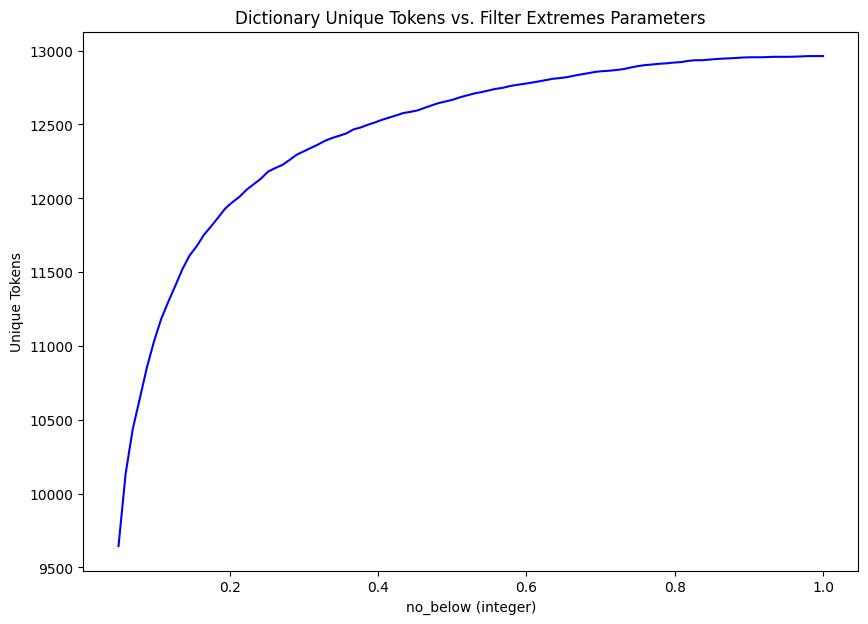

In [9]:
import numpy as np
import matplotlib.pyplot as plt
def get_unique_tokens(no_below, no_above):
    dictionary = Dictionary(trigram_tokens)
    dictionary.filter_extremes(no_below=no_below, no_above=no_above)
    return len(dictionary)

no_above_vals = np.linspace(0.05, 1.0, 100) 
z = []
for i in range(len(no_above_vals)):
     print("Row: ", i)
     z.append(get_unique_tokens(5, no_above_vals[i]))
    
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
surf = ax.plot(no_above_vals, z, 'b')
ax.set_xlabel('no_below (integer)')
ax.set_ylabel('Unique Tokens')
ax.set_title('Dictionary Unique Tokens vs. Filter Extremes Parameters')
plt.show()

In [6]:
no_below_vals = np.arange(1, 20, 2)
no_above_vals = np.linspace(0.05, 1.0, 10) 

X, Y = np.meshgrid(no_below_vals, no_above_vals)
Z = np.zeros_like(X, dtype=float)

print("Looping!")
for i in range(X.shape[0]):
    print("Row: ", i)
    for j in range(X.shape[1]):
        print("Column: ", j)
        nb = int(X[i, j])
        na = float(Y[i, j])
        Z[i, j] = get_unique_tokens(nb, na)
print("Calculated all combinations")

np.savez('./output/plot_data.npz', X=X, Y=Y, Z=Z)
print("Data saved to plot_data.npz")

Looping!
Row:  0
Column:  0
Column:  1
Column:  2
Column:  3
Column:  4
Column:  5
Column:  6
Column:  7
Column:  8
Column:  9
Row:  1
Column:  0
Column:  1
Column:  2
Column:  3
Column:  4
Column:  5
Column:  6
Column:  7
Column:  8
Column:  9
Row:  2
Column:  0
Column:  1
Column:  2
Column:  3
Column:  4
Column:  5
Column:  6
Column:  7
Column:  8
Column:  9
Row:  3
Column:  0
Column:  1
Column:  2
Column:  3
Column:  4
Column:  5
Column:  6
Column:  7
Column:  8
Column:  9
Row:  4
Column:  0
Column:  1
Column:  2
Column:  3
Column:  4
Column:  5
Column:  6
Column:  7
Column:  8
Column:  9
Row:  5
Column:  0
Column:  1
Column:  2
Column:  3
Column:  4
Column:  5
Column:  6
Column:  7
Column:  8
Column:  9
Row:  6
Column:  0
Column:  1
Column:  2
Column:  3
Column:  4
Column:  5
Column:  6
Column:  7
Column:  8
Column:  9
Row:  7
Column:  0
Column:  1
Column:  2
Column:  3
Column:  4
Column:  5
Column:  6
Column:  7
Column:  8
Column:  9
Row:  8
Column:  0
Column:  1
Column:  2
Column